f:\Aarzoo\Mtech AI\Recordings\sem3\MLOPS\Assignment 2\MLOPS-bits-Group41-Assignment2\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading dataset...
Preprocessing data...
Training model...


f:\Aarzoo\Mtech AI\Recordings\sem3\MLOPS\Assignment 2\MLOPS-bits-Group41-Assignment2\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7626 - loss: 0.6874
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8588 - loss: 0.3951
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8749 - loss: 0.3417
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8843 - loss: 0.3161
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8885 - loss: 0.3014
Run explainability analysis...
Generating SHAP explanations...


PermutationExplainer explainer: 101it [06:43,  4.03s/it]                         
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15036\2027684394.py:48: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train[:100], show=False)  # Generate plot


SHAP Summary Plot saved as shap_summary.html. Open it in a browser to view.


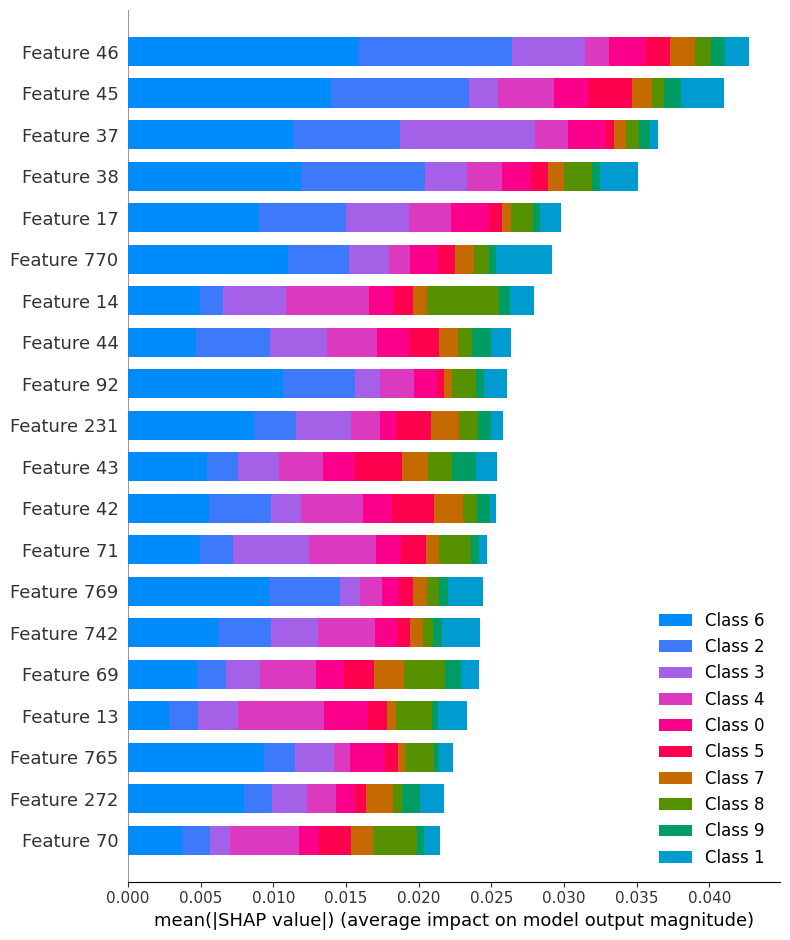

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import MinMaxScaler
import shap
import matplotlib.pyplot as plt

# Load Fashion MNIST
def load_fashion_mnist():
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

    # Flatten images to 1D vectors
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    return X_train, y_train, X_test, y_test

# Feature Engineering (Normalization using MinMax )
def preprocess_data(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Train a simple model for explainability
def train_model(X_train, y_train):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)
    return model

# Explainability & Save SHAP Summary Plot as HTML
def getExplainabilityAnalysis(model, X_train):
    print("Generating SHAP explanations...")

    # Create SHAP Explainer
    explainer = shap.Explainer(model, X_train[:2000])  # Use a subset for efficiency
    shap_values = explainer(X_train[:100], max_evals=3000)  # Compute SHAP values

    # Create and Save SHAP Summary Plot as HTML
    shap_html = "shap_summary.html"
    
    plt.figure()  # Create a new figure
    shap.summary_plot(shap_values, X_train[:100], show=False)  # Generate plot
    
    plt.savefig("shap_summary_plot.png", bbox_inches="tight")  # Save as PNG
    
    # Convert the saved plot to HTML
    with open(shap_html, "w", encoding="utf-8") as f:
        f.write(f"<html><body><h1>SHAP Summary Plot</h1><img src='shap_summary_plot.png'></body></html>")
    
    print(f"SHAP Summary Plot saved as {shap_html}. Open it in a browser to view.")

print("Loading dataset...")
X_train, y_train, X_test, y_test = load_fashion_mnist()

print("Preprocessing data...")
X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)

print("Training model...")
model = train_model(X_train_scaled, y_train)

print("Run explainability analysis...")
getExplainabilityAnalysis(model, X_train_scaled)




Observations:
* From the SHAP tool , we can observe which features are most important and which are least.
* As per the above plot we see that features Feature 46 and 45 have the highest SHAP values, i.e. contribute to the model's predictions across all classes.
* The different colored bars correspons to the different classes, showing contribution of each feature to predicting a specific class . For example, Feature 46 contributes strongly to class 6 (blue) and class 0 (pink) indicating its significance in predicting these classes.
* SHAP provides both global( overall importance across dataset) and local (Individual predictions) explainations. The plot above is an instance of global explaination but SHAP can be useful why a single prediction was made by a model. 
* The above plot also helps to get the information on the multiclass for these features.